### Data analysis of Superstore data

#### Dataset: Retail Sales Data (sales_data.xlsx) 

The dataset contains information about product sales in a retail store. The columns in the dataset include: 
1. Order ID: Unique identifier for each order. 
2. Product: Name of the product sold. 
3. Category: Product category (e.g., Electronics, Clothing, Furniture). 
4. Region: Region where the sale was made. 
5. Quantity Sold: Number of units sold. 
6. Unit Price: Price per unit of the product. 
7. Total Sales: Calculated as Quantity Sold * Unit Price. 
8. Order Date: Date when the order was placed. 
9. Customer Type: New or Returning customer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the Excel file
df = pd.read_excel('C:/Users/mahap/Desktop/PGDBDA/Superstore-Final.xlsx')
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales Trend
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Medium
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,High
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Low
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,High
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Central,FUR-CH-10002084,Furniture,Chairs,Hon Mobius Operator's Chair,860.9300,7,0.00,189.4046,High
3996,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Central,TEC-PH-10003012,Technology,Phones,Nortel Meridian M3904 Professional Digital phone,769.9500,5,0.00,223.2855,High
3997,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Central,OFF-AR-10002704,Office Supplies,Art,Boston 1900 Electric Pencil Sharpener,14.9800,1,0.00,4.4940,Low
3998,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Central,FUR-FU-10000308,Furniture,Furnishings,Deflect-o Glass Clear Studded Chair Mats,373.0800,6,0.00,82.0776,Medium


#### Part 1: Data Cleaning 
1. Remove Duplicate Rows: Identify and remove any duplicate rows in the dataset. 
2. Fix Missing Data: 
 Ensure that there are no missing values in the Product, Category, or Region columns. 
 For any missing values in Quantity Sold or Unit Price, fill in the appropriate values (e.g., using average 
or median values). 

In [3]:
#1 Remove Duplicate Rows: Identify and remove any duplicate rows in the dataset.
df.drop_duplicates(inplace=True)
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales Trend
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Medium
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,High
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Low
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,High
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Central,FUR-CH-10002084,Furniture,Chairs,Hon Mobius Operator's Chair,860.9300,7,0.00,189.4046,High
3996,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Central,TEC-PH-10003012,Technology,Phones,Nortel Meridian M3904 Professional Digital phone,769.9500,5,0.00,223.2855,High
3997,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Central,OFF-AR-10002704,Office Supplies,Art,Boston 1900 Electric Pencil Sharpener,14.9800,1,0.00,4.4940,Low
3998,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Central,FUR-FU-10000308,Furniture,Furnishings,Deflect-o Glass Clear Studded Chair Mats,373.0800,6,0.00,82.0776,Medium


In [4]:
# Fix Missing Data
# Check for missing values
print(df.isnull().sum())


Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Sales Trend      0
dtype: int64


##### <span style='color:red'> No NULL Values </span>

In [5]:
#2 Fill missing values in 'Product', 'Category', and 'Region' with 'Unknown'
df['Product ID'] = df['Product ID'].fillna('Unknown')  # Avoid chained assignment
df['Category'] = df['Category'].fillna('Unknown')  # Avoid chained assignment
df['Region'] = df['Region'].fillna('Unknown')    # Avoid chained assignment

# Print the DataFrame with missing values filled
print(df)

            Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1     CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2     CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3     US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4     US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
...              ...        ...        ...             ...         ...   
3995  CA-2015-105627 2015-03-08 2015-03-12  Standard Class    DK-12895   
3996  CA-2015-105627 2015-03-08 2015-03-12  Standard Class    DK-12895   
3997  CA-2015-105627 2015-03-08 2015-03-12  Standard Class    DK-12895   
3998  CA-2015-105627 2015-03-08 2015-03-12  Standard Class    DK-12895   
3999  US-2015-149629 2015-07-17 2015-07-20    Second Class    MP-17965   

        Customer Name    Segment        Country              City       State  \
0         Claire Gute   Consum

In [6]:
# Assuming you have a DataFrame with columns 'Total Cost' and 'Quantity'
df['Unit Price'] = df['Sales'] / df['Quantity']


In [7]:
#Total Sales Calculation
df['Total Sales'] = df['Quantity'] * df['Unit Price']
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales Trend,Unit Price,Total Sales
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Medium,130.9800,261.9600
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,High,243.9800,731.9400
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Low,7.3100,14.6200
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,High,191.5155,957.5775
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Low,11.1840,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Furniture,Chairs,Hon Mobius Operator's Chair,860.9300,7,0.00,189.4046,High,122.9900,860.9300
3996,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Technology,Phones,Nortel Meridian M3904 Professional Digital phone,769.9500,5,0.00,223.2855,High,153.9900,769.9500
3997,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Office Supplies,Art,Boston 1900 Electric Pencil Sharpener,14.9800,1,0.00,4.4940,Low,14.9800,14.9800
3998,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Furniture,Furnishings,Deflect-o Glass Clear Studded Chair Mats,373.0800,6,0.00,82.0776,Medium,62.1800,373.0800


In [8]:
# Fill missing values in 'Quantity Sold' with the mean
df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
# Fill missing values in 'Unit Price' with the median
df['Unit Price'].fillna(df['Unit Price'].median(), inplace=True)
# Print the DataFrame with missing values filled
print(df)

            Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1     CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2     CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3     US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4     US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
...              ...        ...        ...             ...         ...   
3995  CA-2015-105627 2015-03-08 2015-03-12  Standard Class    DK-12895   
3996  CA-2015-105627 2015-03-08 2015-03-12  Standard Class    DK-12895   
3997  CA-2015-105627 2015-03-08 2015-03-12  Standard Class    DK-12895   
3998  CA-2015-105627 2015-03-08 2015-03-12  Standard Class    DK-12895   
3999  US-2015-149629 2015-07-17 2015-07-20    Second Class    MP-17965   

        Customer Name    Segment        Country              City       State  \
0         Claire Gute   Consum

C:\Users\mahap\AppData\Local\Temp\ipykernel_24952\1369145245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
C:\Users\mahap\AppData\Local\Temp\ipykernel_24952\1369145245.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

#### Part 2: Data Analysis and Summary
1.Total Sales Calculation: Ensure that the Total Sales column is correct by recalculating the values as Quantity Sold * Unit Price.

2.Sorting: Sort the data by Total Sales in descending order. Identify the top 10 orders with the highest total sales.

3.Filtering: Filter the data to display only the sales from the "Electronics" category in the "West" region.

4.Subtotals: Add subtotals for the Total Sales by Region.

In [9]:
#2.Sorting: Sort the data by Total Sales in descending order. Identify the top 10 orders with the highest total sales.
top_10_orders = df.sort_values(by='Total Sales', ascending=False).head(10)
print(top_10_orders)


            Order ID Order Date  Ship Date       Ship Mode Customer ID  \
2697  CA-2014-145317 2014-03-18 2014-03-23  Standard Class    SM-20320   
2623  CA-2017-127180 2017-10-22 2017-10-24     First Class    TA-21385   
2505  CA-2014-143917 2014-07-25 2014-07-27    Second Class    KL-16645   
165   CA-2014-139892 2014-09-08 2014-09-12  Standard Class    BM-11140   
683   US-2017-168116 2017-11-04 2017-11-04        Same Day    GT-14635   
509   CA-2015-145352 2015-03-16 2015-03-22  Standard Class    CM-12385   
1085  US-2016-143819 2016-03-01 2016-03-05  Standard Class    KD-16270   
1803  CA-2017-158379 2017-09-22 2017-09-26    Second Class    JA-15970   
2492  CA-2014-144624 2014-11-19 2014-11-23  Standard Class    JM-15865   
353   CA-2016-129714 2016-09-01 2016-09-03     First Class    AB-10060   

             Customer Name      Segment        Country           City  \
2697           Sean Miller  Home Office  United States   Jacksonville   
2623          Tom Ashbrook  Home Office

In [10]:
#3.Filtering: Filter the data to display only the sales from the "Electronics" category in the "West" region.
electronics_west = df[(df['Category'] == 'Technology') & (df['Region'] == 'West')]
print(electronics_west)

            Order ID Order Date  Ship Date       Ship Mode Customer ID  \
7     CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
11    CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
19    CA-2014-143336 2014-08-27 2014-09-01    Second Class    ZD-21925   
26    CA-2016-121755 2016-01-16 2016-01-20    Second Class    EH-13945   
62    CA-2015-135545 2015-11-24 2015-11-30  Standard Class    KM-16720   
...              ...        ...        ...             ...         ...   
3892  US-2016-163881 2016-11-24 2016-11-30  Standard Class    SP-20860   
3935  CA-2017-123001 2017-09-02 2017-09-08  Standard Class    AW-10840   
3952  US-2016-151862 2016-03-01 2016-03-08  Standard Class    ON-18715   
3978  CA-2017-101308 2017-10-02 2017-10-07  Standard Class    FG-14260   
3983  CA-2016-135265 2016-07-07 2016-07-09    Second Class    CC-12370   

           Customer Name      Segment        Country           City  \
7        Brosina Hoffman     Consumer  U

In [11]:
#4.Subtotals: Add subtotals for the Total Sales by Region.
subtotals = df.groupby('Region')['Total Sales'].sum()
print(subtotals)

Region
Central    198716.754
East       259709.688
South      172555.503
West       292039.836
Name: Total Sales, dtype: float64


#### Part 3: Pivot Table Analysis

In [12]:
# Pivot Table 1: Create a pivot table that summarizes the Total Sales by Category and Region. Use Region as the rows and Category as the columns.
# Create Pivot Table 1
pivot_table1 = df.pivot_table(values='Total Sales', index='Region', columns='Category', aggfunc='sum')
print(pivot_table1)



Category   Furniture  Office Supplies  Technology
Region                                           
Central    70818.313        50805.969   77092.472
East       72023.552        89884.694   97801.442
South      44318.462        58641.656   69595.385
West      105559.505        83191.556  103288.775


In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date']) # Convert Order Date to datetime format
df['Customer Type'] = df.groupby('Customer ID')['Order Date'].transform('min') == df['Order Date'] # Create Customer Type based on the first purchase
df['Customer Type'] = df['Customer Type'].map({True: 'New', False: 'Returning'})  # Convert boolean values to 'New' or 'Returning'
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales Trend,Unit Price,Total Sales,Customer Type
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Medium,130.9800,261.9600,New
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,High,243.9800,731.9400,New
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Low,7.3100,14.6200,New
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,High,191.5155,957.5775,New
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Low,11.1840,22.3680,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Chairs,Hon Mobius Operator's Chair,860.9300,7,0.00,189.4046,High,122.9900,860.9300,New
3996,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Phones,Nortel Meridian M3904 Professional Digital phone,769.9500,5,0.00,223.2855,High,153.9900,769.9500,New
3997,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Art,Boston 1900 Electric Pencil Sharpener,14.9800,1,0.00,4.4940,Low,14.9800,14.9800,New
3998,CA-2015-105627,2015-03-08,2015-03-12,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,...,Furnishings,Deflect-o Glass Clear Studded Chair Mats,373.0800,6,0.00,82.0776,Medium,62.1800,373.0800,New


In [14]:
pivot_table2 = pd.pivot_table(df, values='Quantity', index='Product Name', columns='Customer Type', aggfunc='mean',fill_value=0)
  
print(pivot_table2)

Customer Type                                       New  Returning
Product Name                                                      
"While you Were Out" Message Book, One Form per...  2.0   3.000000
#10 Gummed Flap White Envelopes, 100/Box            0.0   2.666667
#10 Self-Seal White Envelopes                       1.0   4.000000
#10 White Business Envelopes,4 1/8 x 9 1/2          0.0   4.000000
#10- 4 1/8" x 9 1/2" Recycled Envelopes             2.5   4.500000
...                                                 ...        ...
i.Sound Portable Power - 8000 mAh                   1.0   2.000000
iHome FM Clock Radio with Lightning Dock            0.0   5.000000
iKross Bluetooth Portable Keyboard + Cell Phone...  0.0   3.000000
invisibleSHIELD by ZAGG Smudge-Free Screen Prot...  3.0   4.000000
netTALK DUO VoIP Telephone Service                  3.0   4.250000

[1606 rows x 2 columns]


#### Part 4: Data Visualization

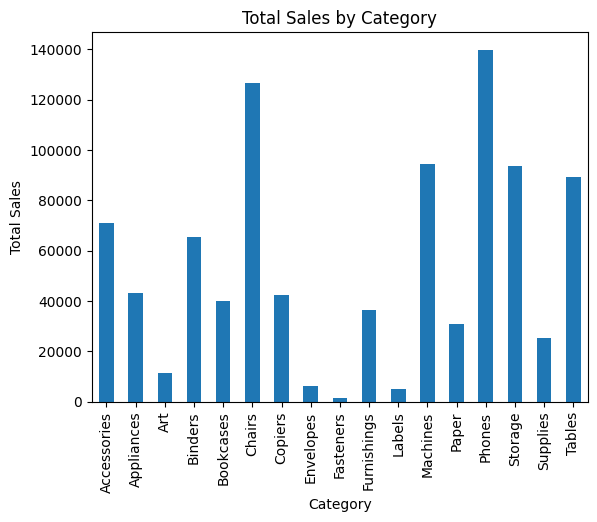

In [15]:
#1.Bar Chart: Create a bar chart that shows the total sales for each Product Category.
df.groupby('Sub-Category')['Total Sales'].sum().plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

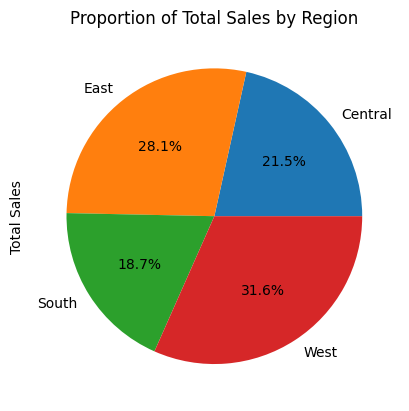

In [16]:
# 2. Pie Chart: Proportion of Total Sales by Region
df.groupby('Region')['Total Sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Total Sales by Region')
plt.show()

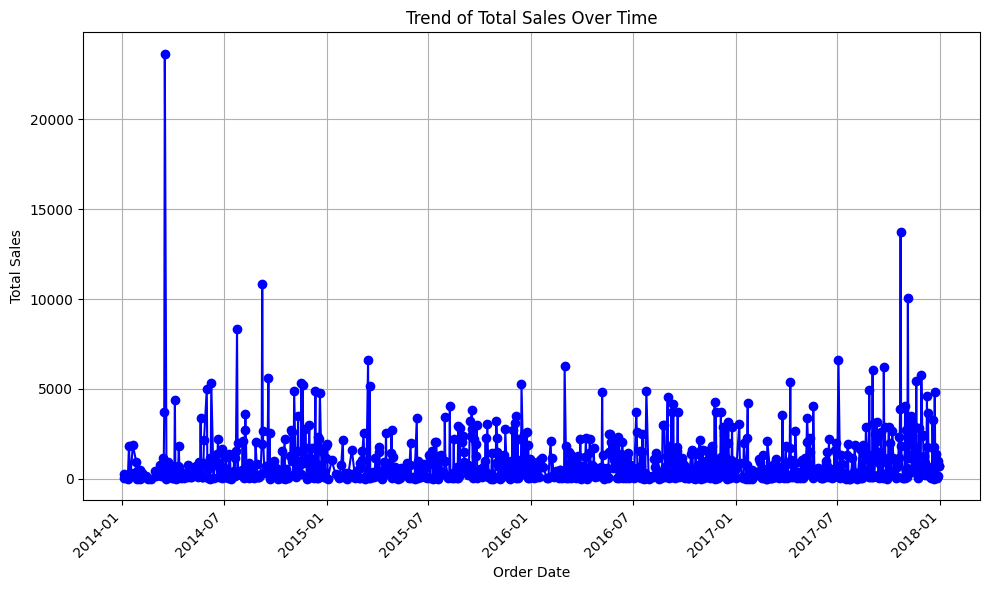

In [17]:
# 3. Line Chart: Trend of Total Sales Over Time
df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_trend = df.groupby('Order Date')['Total Sales'].sum()

plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', marker='o', color='b')
plt.title('Trend of Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Part 5: Summary Report 
##### Using the data from your analysis, write a short summary (in Excel or a separate document) answering the following questions: 

In [18]:
#1. Which product category has the highest total sales overall? 
category_sales = df.groupby('Category')['Total Sales'].sum()
highest_sales_category = category_sales.idxmax()
print("Product category with the highest total sales:", highest_sales_category)

Product category with the highest total sales: Technology


In [19]:
#2. Which region generates the most sales? 
region_sales = df.groupby('Region')['Total Sales'].sum()
highest_sales_region = region_sales.idxmax()

print("Region with the highest total sales:", highest_sales_region)

Region with the highest total sales: West


In [20]:
#3. What is the average quantity sold for returning customers compared to new customers?
# Group the data by customer type and calculate the average quantity sold
avg_quantity_by_customer_type = df.groupby('Customer Type')['Quantity'].mean()

print(avg_quantity_by_customer_type)

Customer Type
New          3.868821
Returning    3.768278
Name: Quantity, dtype: float64


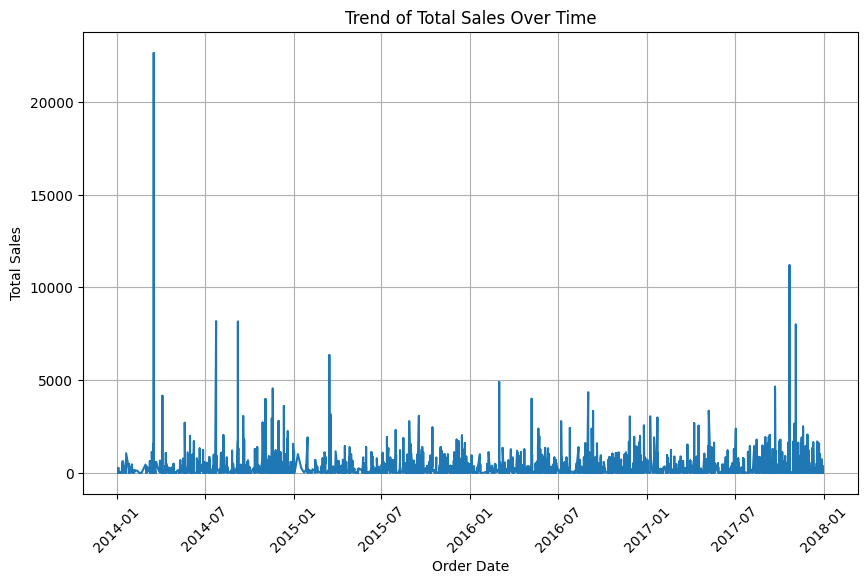

In [21]:
#4. What trends do you observe in the total sales over time?
# Sort the DataFrame by 'Order Date'
df.sort_values('Order Date', inplace=True)

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Order Date'], df['Total Sales'])
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Trend of Total Sales Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [22]:
# Store the DataFrame in an Excel file
df.to_excel('sales_data.xlsx', index=False, engine='openpyxl')

print("Dataset saved to 'sales_data.xlsx'.")

Dataset saved to 'sales_data.xlsx'.
